In [1]:
# %matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as sts
import matplotlib as mpl

In [3]:
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
print(sum(city_data_df["type"]=="Urban"))
print(sum(city_data_df["type"]=="Suburban"))
print(sum(city_data_df["type"]=="Rural"))

66
36
18


In [10]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()                                                            

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()   

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [19]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()   

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [20]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()                                                            

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()   

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [22]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()   

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [23]:
urban_avg_driver = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_driver.head()  

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [24]:
suburban_avg_driver = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_driver.head()  

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [25]:
rural_avg_driver = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_driver.head()  

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

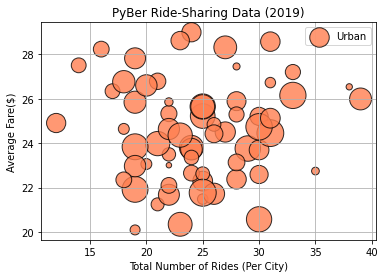

In [26]:
plt.scatter(urban_ride_count,urban_avg_fare, s=urban_avg_driver*10, c="coral",edgecolor = "black",alpha = 0.8,label = "Urban", linewidths=1)

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.grid(True)
plt.show()

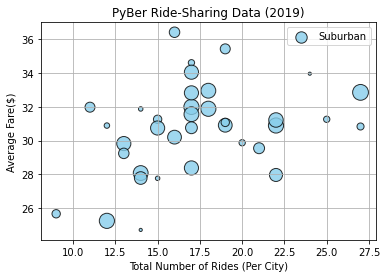

In [27]:
plt.scatter(suburban_ride_count,suburban_avg_fare, s=suburban_avg_driver*10, c="skyblue",edgecolor = "black", label = "Suburban",alpha = 0.8, linewidths=1)

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.grid(True)
plt.show()

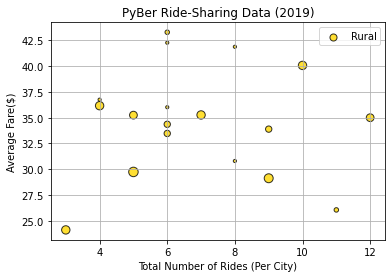

In [28]:
plt.scatter(rural_ride_count,rural_avg_fare, s=rural_avg_driver*10, c="gold",edgecolor = "black", label = "Rural",alpha = 0.8, linewidths=1)

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.grid(True)
plt.show()

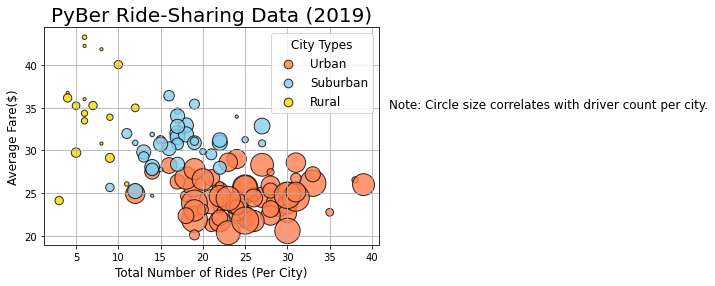

In [29]:
plt.scatter(urban_ride_count,urban_avg_fare, s=urban_avg_driver*10, c="coral",edgecolor = "black",alpha = 0.8,label = "Urban", linewidths=1)
plt.scatter(suburban_ride_count,suburban_avg_fare, s=suburban_avg_driver*10, c="skyblue",edgecolor = "black", label = "Suburban",alpha = 0.8, linewidths=1)
plt.scatter(rural_ride_count,rural_avg_fare, s=rural_avg_driver*10, c="gold",edgecolor = "black", label = "Rural",alpha = 0.8, linewidths=1)



plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.ylabel("Average Fare($)",fontsize=12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.legend()
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.grid(True)

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("Analysis/Fig1.png")
plt.show()

In [30]:
urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [31]:
suburban_cities_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [32]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [33]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [34]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [35]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [36]:
round(urban_ride_count.mean(),1), round(suburban_ride_count.mean(),1), round(rural_ride_count.mean(),1)

(24.6, 17.4, 6.9)

In [37]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [38]:
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [39]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [40]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [41]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [42]:
urban_fares = urban_cities_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [43]:
mean_urban_fares = np.mean(urban_fares)

print(f"Mean Urban fare: {mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)

print(f"Median Urban fare: {median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)

print(f"Mode Urban fare: {mode_urban_fares}.")

Mean Urban fare: 24.53.
Median Urban fare: 24.64.
Mode Urban fare: ModeResult(mode=array([22.86]), count=array([5])).


In [44]:
suburban_fares = suburban_cities_df["fare"]

suburban_fares.head()

mean_suburban_fares = np.mean(suburban_fares)

print(f"Mean Suburban fare: {mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(urban_fares)

print(f"Median Suburban fare: {median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)

print(f"Mode Suburban fare: {mode_suburban_fares}.")

Mean Suburban fare: 30.97.
Median Suburban fare: 24.64.
Mode Suburban fare: ModeResult(mode=array([17.99]), count=array([3])).


In [45]:
rural_fares = rural_cities_df["fare"]

rural_fares.head()

mean_rural_fares = np.mean(rural_fares)

print(f"Mean rural fare: {mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)

print(f"Median rural fare: {median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)

print(f"Mode rural fare: {mode_rural_fares}.")

Mean rural fare: 34.62.
Median rural fare: 37.05.
Mode rural fare: ModeResult(mode=array([37.05]), count=array([2])).


In [46]:
urban_drivers = urban_cities_df["driver_count"]

urban_drivers.head()

mean_urban_drivers = np.mean(urban_drivers)

print(f"Mean Urban drivers: {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)

print(f"Median Urban drivers: {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)

print(f"Mode Urban drivers: {mode_urban_drivers}.")


Mean Urban drivers: 36.68.
Median Urban drivers: 37.00.
Mode Urban drivers: ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [47]:
suburban_drivers = suburban_cities_df["driver_count"]

suburban_drivers.head()

mean_suburban_drivers = np.mean(suburban_drivers)

print(f"Mean suburban drivers: {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)

print(f"Median suburban drivers: {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)

print(f"Mode suburban drivers: {mode_suburban_drivers}.")

Mean suburban drivers: 13.71.
Median suburban drivers: 16.00.
Mode suburban drivers: ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [48]:
rural_drivers = rural_cities_df["driver_count"]

rural_drivers.head()

mean_rural_drivers = np.mean(rural_drivers)

print(f"Mean rural drivers: {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)

print(f"Median rural drivers: {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)

print(f"Mode rural drivers: {mode_rural_drivers}.")

Mean rural drivers: 4.30.
Median rural drivers: 4.00.
Mode rural drivers: ModeResult(mode=array([1], dtype=int64), count=array([32])).


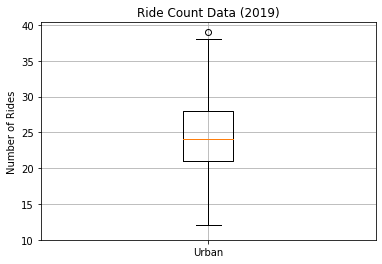

In [49]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]

fig, ax = plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(10,41, step =5))

ax.grid()
plt.show()


In [50]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

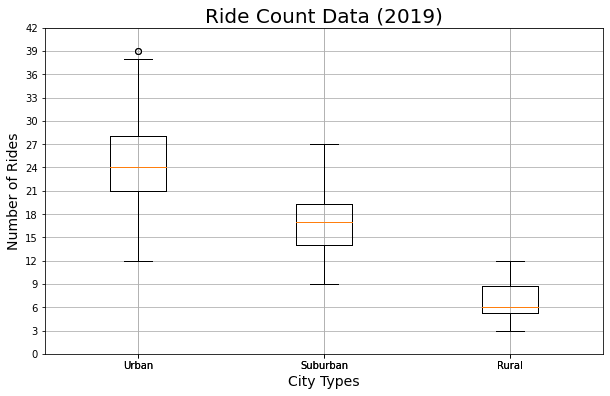

In [51]:
x_labels = ["Urban","Suburban", "Rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(ride_count_data, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Ride Count Data (2019)", fontsize=20)

ax.set_ylabel("Number of Rides",fontsize=14)

ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)
           
ax.set_yticks(np.arange(0,45, step =3.0))

ax.grid()

plt.savefig("Analysis/Fig2.png")
plt.show()

In [52]:
urban_city_outilier = urban_ride_count[urban_ride_count==39].index[0]

print(f"{urban_city_outilier} has the highest rider count.")

West Angela has the highest rider count.


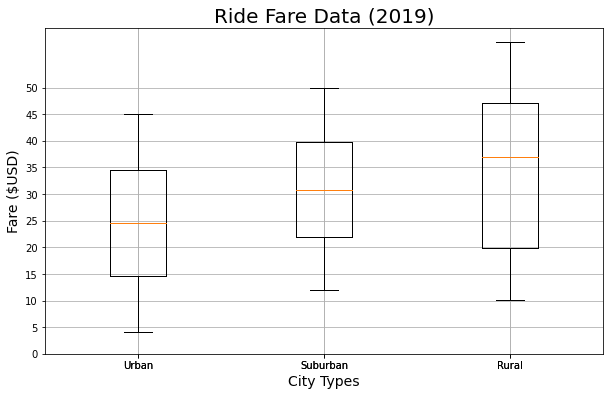

Summary Statistics


In [53]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ["Urban","Suburban", "Rural"]

ride_fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(ride_fare_data, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Ride Fare Data (2019)", fontsize=20)

ax.set_ylabel("Fare ($USD)",fontsize=14)

ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(ride_fare_data, labels=x_labels)
           
ax.set_yticks(np.arange(0,51, step =5.0))

ax.grid()

plt.savefig("Analysis/Fig3.png")
plt.show()

print("Summary Statistics")



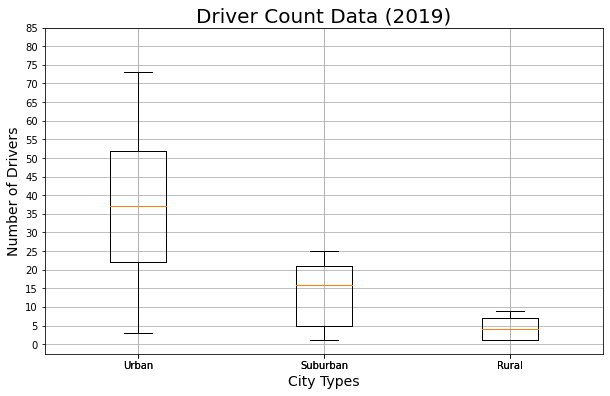

In [54]:
x_labels = ["Urban","Suburban", "Rural"]

driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(driver_count_data, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Driver Count Data (2019)", fontsize=20)

ax.set_ylabel("Number of Drivers",fontsize=14)

ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(driver_count_data, labels=x_labels)
           
ax.set_yticks(np.arange(0,90, step =5))

ax.grid()

plt.savefig("Analysis/Fig4.png")
plt.show()




In [55]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [56]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [57]:
# Calculate the percentage of fare for each city type.

type_percents = 100 * sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

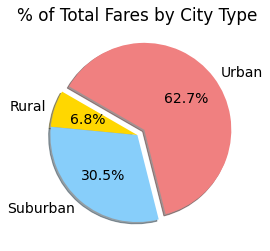

In [68]:
plt.pie(type_percents, labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1],autopct='%1.1f%%',
       shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

mpl.rcParams['font.size'] =14

plt.savefig("Analysis/Fig5.png")

plt.show()

In [63]:
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [64]:
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [65]:
percent_rides = 100 * sum_rides_by_type / total_rides
percent_rides

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

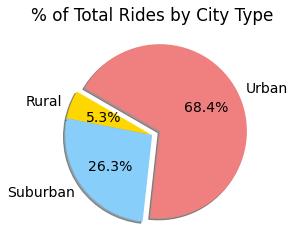

In [70]:
plt.pie(percent_rides, labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1],autopct='%1.1f%%',
       shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

mpl.rcParams['font.size'] =14

plt.savefig("Analysis/Fig6.png")

plt.show()